# Simple Linear Regression
* 1.Read the dataset
* 2.EDA,FE
* 3.Divide our dataset into independent and dependent feature
* 4.Further divide the dataset into train and test
* 5.Train Model
* 6.Check Performance Metrics by(MAE,MSE,RMSE)
* 7.Check Accuracy of the model by(R squared and Adjusted R-Squared)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# importing the dataset
hw_df = pd.read_csv('Weight_height.csv')
hw_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'Height')

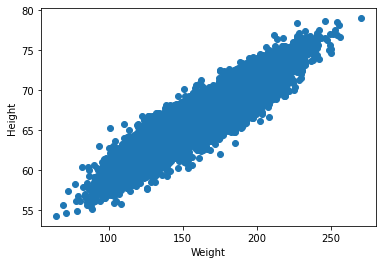

In [3]:
# ploting the dataset 
plt.scatter(hw_df['Weight'],hw_df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [4]:
hw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
hw_df['Gender'] = hw_df['Gender'].astype('category')

hw_df['Gender'] = hw_df['Gender'].map({'Male': 0, 'Female': 1})

In [6]:
hw_df

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801
...,...,...,...
9995,1,66.172652,136.777454
9996,1,67.067155,170.867906
9997,1,63.867992,128.475319
9998,1,69.034243,163.852461


In [7]:
hw_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [8]:
hw_df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [9]:
# dividing dataset into dependent and independent feature 
X = hw_df[['Weight']] # idnependent feature

y = hw_df['Height'] # dependent features

In [10]:
X.shape,y.shape

((10000, 1), (10000,))

In [11]:
hw_df[['Height', 'Weight']] = hw_df[['Height', 'Weight']].astype(int)

In [12]:
hw_df

,Gender,Height,Weight
0,0,73,241
1,0,68,162
2,0,74,212
3,0,71,220
4,0,69,206
...,...,...,...
9995,1,66,136
9996,1,67,170
9997,1,63,128
9998,1,69,163


In [13]:
X.shape,y.shape

((10000, 1), (10000,))

In [14]:
# splitting some data into train and test by using sklearn library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape #in above the test_size attribute move the desired dateset 

((8000, 1), (2000, 1))

In [15]:
y_train.shape,y_test.shape

((8000,), (2000,))

In [16]:
# scaling the dataset for faster performance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [17]:
# always scale independent dataset not dependent 
# usually for training dataset we perform fit_transform() & for test is tranform() method
X_train=scaler.fit_transform(X_train) 
X_test=scaler.transform(X_test)

In [18]:
X_test

array([[ 0.36793009],
       [ 1.05598138],
       [ 0.27747375],
       ...,
       [-1.12814091],
       [ 0.81914676],
       [-1.83691726]])

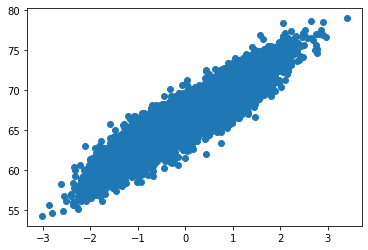

In [19]:
plt.scatter(X_train,y_train)

In [20]:
# checking how transform work
scaler.transform([[80]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.53816571]])

# Model Training

In [21]:
## Model Training
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [22]:
## Training the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
# linear reggresor gives the intercept and coef (theta 0,theta 1)
regressor.intercept_

66.35968140754125

In [24]:
regressor.coef_

array([3.55479288])

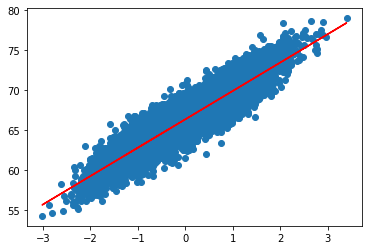

In [25]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

**Prediction of train data**
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train = 66.36 + 3.55(X_train)

***Prediction of test data***
1. predicted height output = intercept +coef_(Weights)
2. y_pred_test = 66.36 + 3.55(X_test)

In [26]:
## Prediction for test data
y_pred_test=regressor.predict(X_test)
y_pred_test

array([67.66759668, 70.11347651, 67.34604312, ..., 62.34937415,
       69.27157848, 59.829821  ])

In [27]:
y_test

6252    68.687232
4684    68.829334
1731    66.398128
4742    71.929340
4521    67.042903
          ...    
6412    65.748601
8285    60.731857
7853    62.188933
1095    67.068304
6929    58.632720
Name: Height, Length: 2000, dtype: float64

## Performance Metrics MAE,MSE,RMSE

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [29]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.112361948988646
1.158865633208018
1.4533966936073048


## Accuracy of the model R squared and Adjusted r ssquared

**R square Formula**
R^2 = 1 - SSR/SST     <br>
R^2 = Accuracy of the model    <br>
SSR = sum of squares of residuals  <br>
SST = total sum of squares.

In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.8578120230534221

**Adjusted R-Square**
Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:
R2: The R2 of the model  <br>
n: The number of observations   <br>
k: The number of predictor variables

In [31]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8577408578997952

The adjusted R-squared value provides a more accurate measure of the goodness-of-fit of a regression model when comparing   models with different numbers of independent variables.

A higher adjusted R-squared value indicates that the model has a better fit, as it explains more of the variance in the dependent variable while taking into account the number of independent variables in the model.

In [32]:
scaler

StandardScaler()

In [33]:
regressor

LinearRegression()